# Problem Set 8
##### Serena Flint

### Problem 1

In [14]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

#fills a 2D array with randomized +1s and -1s
def random_arr(x_size, y_size):
    arr = np.zeros((x_size, y_size))
    for i in range (0, x_size):
        for j in range(0, y_size):
            rand = np.random.random()
            if(rand>=0.5):
                arr[i,j] = 1
            else:
                arr[i,j] = -1     
    return arr

#calculates total energy of spin array
def total_energy(spins, J):
    center = spins
    up = np.roll(spins, +1, axis = 0)
    right = np.roll(spins, +1, axis = 1)
    arr_sum = up + right
    arr_tsum = np.sum(arr_sum*center)
    E = -J * arr_tsum
    return E

#flips the spin of the value at the specified indices
def flip(spins_1, x_idx, y_idx):
    temp = spins_1
    temp[x_idx, y_idx] *= -1
    return temp

#calculates the energy difference when a single spin is flipped
def difference(spins_0, x_idx, y_idx, J):
    spins_1 = spins_0
    center_1 = spins_0
    #print("\n", center_1)
    up_1 = np.roll(spins_1, +1, axis = 0)
    right_1 = np.roll(spins_1, +1, axis = 1)
    sum_1 = up_1 + right_1    
    sum_1t = np.sum(sum_1*center_1)
    E_1 = -J*sum_1t
    
    spins_2 = flip(spins_1, x_idx, y_idx)
    center_2 = spins_2
    #print("\n", center_2)
    up_2 = np.roll(spins_2, +1, axis = 0)
    right_2 = np.roll(spins_2, +1, axis = 1)
    sum_1t = np.sum(sum_1*center_1)
    sum_2 = up_2 + right_2
    sum_2t = np.sum(sum_2*center_2)
    E_2 = -J*sum_2t
    
    diff = E_2 - E_1
    return diff
    
#calculates magnetization of the array
def magnetization(spins_3):
    tot=np.sum(spins_3)
    avg=tot/len(spins_3)
    return avg
    
test_arr = random_arr(5,5)
#print(test_arr)
#print(flip(test_arr, 2,3))
print("Difference Routine:", difference(test_arr,2,3,+1.4))
print("Difference using Energy Routines:", (total_energy(test_arr, +1.4)) - (total_energy(flip(test_arr, 2, 3),+1.4)) )
print("Magnetization:", magnetization(test_arr))            

Difference Routine: 11.2
Difference using Energy Routines: 11.2
Magnetization: 1.8


#### Part 2

In [58]:
def rand_idx(spins):
    x = np.random.randint(0,len(spins))
    y = np.random.randint(0,len(spins[0]))
    return x,y

def metropolis(spins, J, T, kB):
    length = len(spins)*len(spins[0])
    count = 0
    mag_arr = []
    for i in range(0, length):
        x_index, y_index = rand_idx(spins)
        DE = difference(spins, x_index, y_index, J)

        if(DE < 0):
            #print("\nDE < 0")
            new_arr = flip(spins, x_index, y_index)
        elif(DE > 0):
            #print("\nDE > 0")
            new_arr = spins
            beta = 1.0/(kB*T)
            rand = np.random.random()
            #print(rand)
            prob = np.exp(-beta*DE)
            if(rand < prob):
                new_arr = flip(spins, x_index, y_index);
            elif(rand >= prob):
                new_arr = spins
        elif(DE == 0):
            #print("\nDE = 0")
            new_arr = spins
        count += 1
        #print("Magnetization at Index", count, ":", magnetization(new_arr))
        mag_arr.append(magnetization(new_arr))
        
    print("\nFinal Magnetization:", magnetization(new_arr))
    return new_arr, mag_arr

test = random_arr(5,5)
J = 1.4
kB = 1
T = 0.5

arr, mag = metropolis(test, J, T, kB)
print("\n", arr)


Final Magnetization: -0.2

 [[-1. -1.  1.  1. -1.]
 [-1.  1.  1. -1.  1.]
 [ 1. -1. -1.  1. -1.]
 [-1.  1.  1. -1.  1.]
 [ 1. -1.  1. -1. -1.]]


In [71]:
test2 = random_arr(100,100)
J2 = 1
kB2 = 1
T2 = 0.01

arr2, mag2 = metropolis(test2, J2, T2, kB2)
print("T < 1: \n", arr)

J3 = 1
kB3 = 1
T3 = 20
arr3, mag3 = metropolis(test2, J3, T3, kB3)
print("T > 1: \n", arr3)


Final Magnetization: 0.84
T < 1: 
 [[-1. -1.  1.  1. -1.]
 [-1.  1.  1. -1.  1.]
 [ 1. -1. -1.  1. -1.]
 [-1.  1.  1. -1.  1.]
 [ 1. -1.  1. -1. -1.]]

Final Magnetization: -0.06
T > 1: 
 [[ 1. -1.  1. ...  1. -1.  1.]
 [ 1.  1. -1. ...  1.  1. -1.]
 [ 1. -1.  1. ... -1. -1.  1.]
 ...
 [-1.  1. -1. ...  1. -1.  1.]
 [ 1. -1.  1. ... -1.  1. -1.]
 [-1.  1. -1. ...  1. -1. -1.]]


The above code shows how with T < 1, the magnetization tends towards -1/+1, while with T > 1, the magnetization tends closer to 0.


Final Magnetization: 0.2
[1.000e+00 2.000e+00 3.000e+00 ... 9.998e+03 9.999e+03 1.000e+04]


Text(0.5, 0, 'Step')

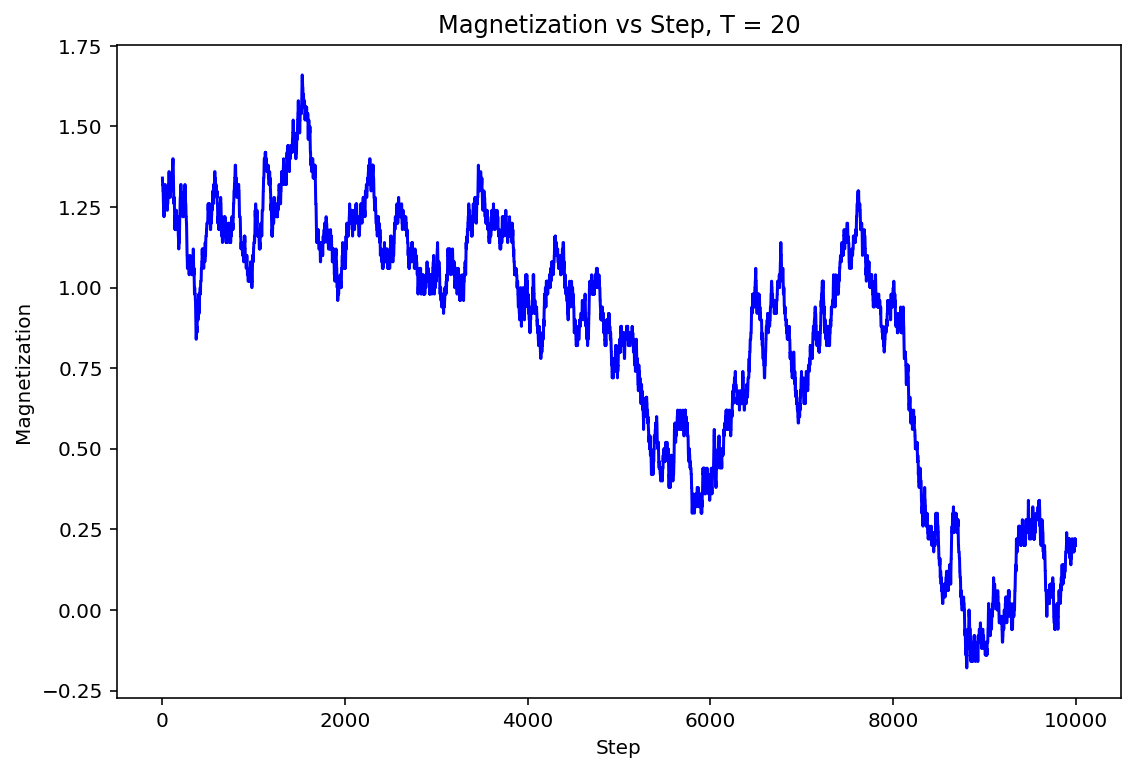

In [108]:
test4 = random_arr(100,100)
J4 = 1
kB4 = 1
T4 = 20
arr4, mag4 = metropolis(test4, J4, T4, kB4)

mag_x = np.ones(len(mag4))
for i in range(0,len(mag4)):
    mag_x[i]+=i
    
print(mag_x)

plt.figure(figsize=(9,6))
plt.plot(mag_x, mag4, 'b-')
plt.title("Magnetization vs Step, T = 20")
plt.ylabel("Magnetization")
plt.xlabel("Step")

The graph above represents a 100x100 matrix with $\kappa_{B}=1$, $J = 1$, and $T = 20$. Here, we can see that the graph initially starts magnetized near +1.3, but slowly falls and stabilizes near $\pm0$.